In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import matplotlib.gridspec as gridspec

plt.rcParams['figure.figsize']=(7,6)
plt.rcParams['axes.linewidth'] = 3
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('axes', labelsize=16)
plt.rc('legend', fontsize=16)
plt.rcParams['lines.markersize'] = 8
plt.rcParams['lines.linewidth'] = 4
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'
plt.rcParams['xtick.major.size']=10
plt.rcParams['xtick.major.width']=2
plt.rcParams['ytick.major.size']=10
plt.rcParams['ytick.major.width']=2
plt.rcParams['legend.edgecolor']='k'
plt.rcParams['axes.unicode_minus']=False
plt.rcParams["legend.framealpha"] = 1
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8
plt.rcParams['legend.handletextpad']=0.4
plt.rcParams['legend.columnspacing']=0.5
plt.rcParams['legend.labelspacing']=0.3
plt.rcParams['legend.title_fontsize'] = 14
plt.rcParams['axes.formatter.limits']=(-3, 6)


class Molecule:
    
        def __init__(self):
            #start by defining some physical constants
            self.n_bee = 2000

def parse_input(species, molecule):
    
    script_dir='../ensembles/'
    inputfile =  str(script_dir) + str(species) + '_ads_bee.txt'
    data=pd.read_csv(inputfile, sep="\t", header=0)
    molecule.perturbation=data.iloc[:,3].to_numpy()
    
    return molecule.perturbation

In [4]:
test = Molecule()
parse_input('CC',test)

array([-27.1197385 ,  -7.654215  ,  -0.26681121, ..., -11.28469772,
        33.19425593,  -2.91509145])

In [28]:
##run each one for debugging
name='C-*RO'
list_of_species = 'species_list_' + name +  '.dat'
info = open(list_of_species,'r')
species_list = info.readlines()
info.close()

array_list=[]
counter = -1
for species in species_list:
    counter += 1
    filename = species.strip()
    print(filename)
  
    test = Molecule()
    array_list.append(parse_input(filename, test))
    
stacked=np.stack(array_list, axis=0)
avg = np.mean(stacked, axis = 0)

output_file='ensembles/' + name + '_bee.txt'
column_names=['averaged_values']
df=pd.DataFrame(avg, columns=[column_names])
df.to_csv(output_file,sep="\t", index=False)

HCO
COOH
CH3CO
CHCO
CH3CH2CO


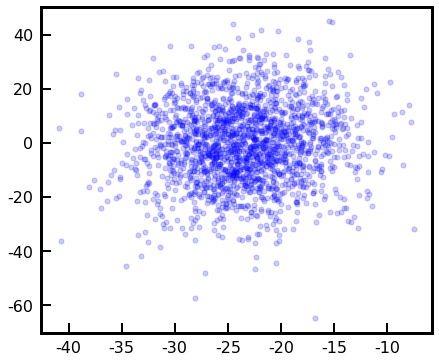

In [29]:
H=pd.read_csv('../H_ads_bee.txt', sep="\t", header=0) 
gs=gridspec.GridSpec(nrows=1, ncols=1)
gs.update(wspace=0.3, hspace=0.2)

ax0=plt.subplot(gs[0,0])

ax0.plot(H.iloc[:,1], avg,  color='b', marker='o', linestyle='None', markersize=5, alpha=0.2)     